In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from lazypredict.Supervised import LazyClassifier
from sklearn import metrics
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.svm import SVC
from six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus
from  sklearn.ensemble import RandomForestClassifier

# **Reading Data**

In [3]:
titanic=pd.read_csv('titanic.csv')
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.00,1,0,A/5 21171,7.25,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00,1,0,PC 17599,71.28,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.00,0,0,STON/O2. 3101282,7.92,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00,1,0,113803,53.10,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.00,0,0,373450,8.05,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.00,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.00,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.00,0,0,111369,30.00,C148,C


# **Data Preprocessing**

In [4]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


titanic
survival - Survival (0 = No; 1 = Yes)
class - Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)
name - Name
sex - Sex
age - Age
sibsp - Number of Siblings/Spouses Aboard
parch - Number of Parents/Children Aboard
ticket - Ticket Number
fare - Passenger Fare
cabin - Cabin
embarked - Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton

In [5]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:

titanic.drop(['Cabin','Ticket','PassengerId','Name'],axis=1,inplace=True)

In [7]:
titanic

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.00,1,0,7.25,S
1,1,1,female,38.00,1,0,71.28,C
2,1,3,female,26.00,0,0,7.92,S
3,1,1,female,35.00,1,0,53.10,S
4,0,3,male,35.00,0,0,8.05,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.00,0,0,13.00,S
887,1,1,female,19.00,0,0,30.00,S
888,0,3,female,NaN,1,2,23.45,S
889,1,1,male,26.00,0,0,30.00,C


In [8]:
titanic['Sex']=LabelEncoder().fit_transform(titanic['Sex'])
titanic['Embarked']=LabelEncoder().fit_transform(titanic['Embarked'])

# **Data Visualization**

<Axes: xlabel='Sex', ylabel='count'>

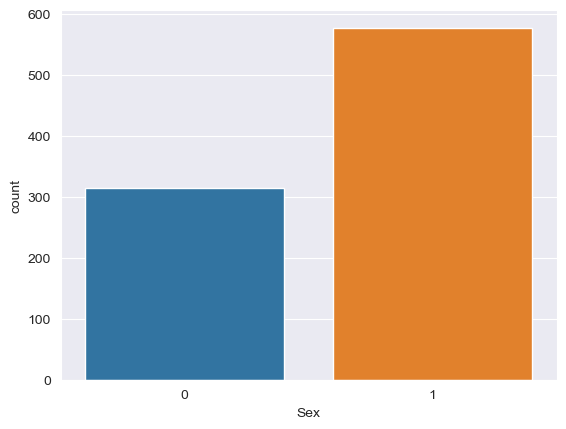

In [9]:
sns.countplot(titanic,x='Sex')

<Axes: xlabel='Survived', ylabel='count'>

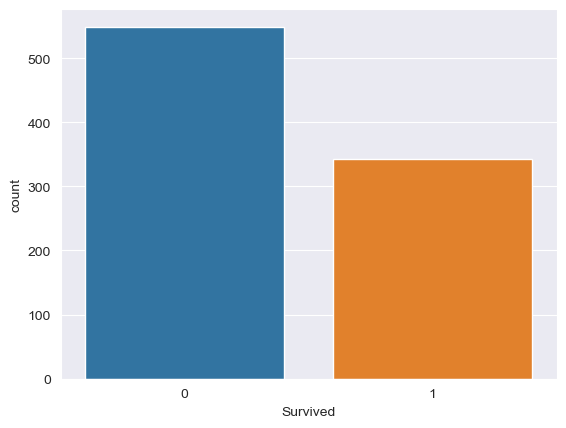

In [10]:
sns.countplot(titanic,x='Survived')

<Axes: >

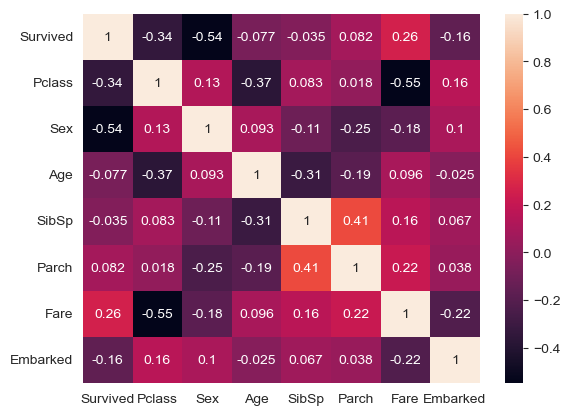

In [11]:
sns.heatmap(data=titanic.corr(),annot=True)

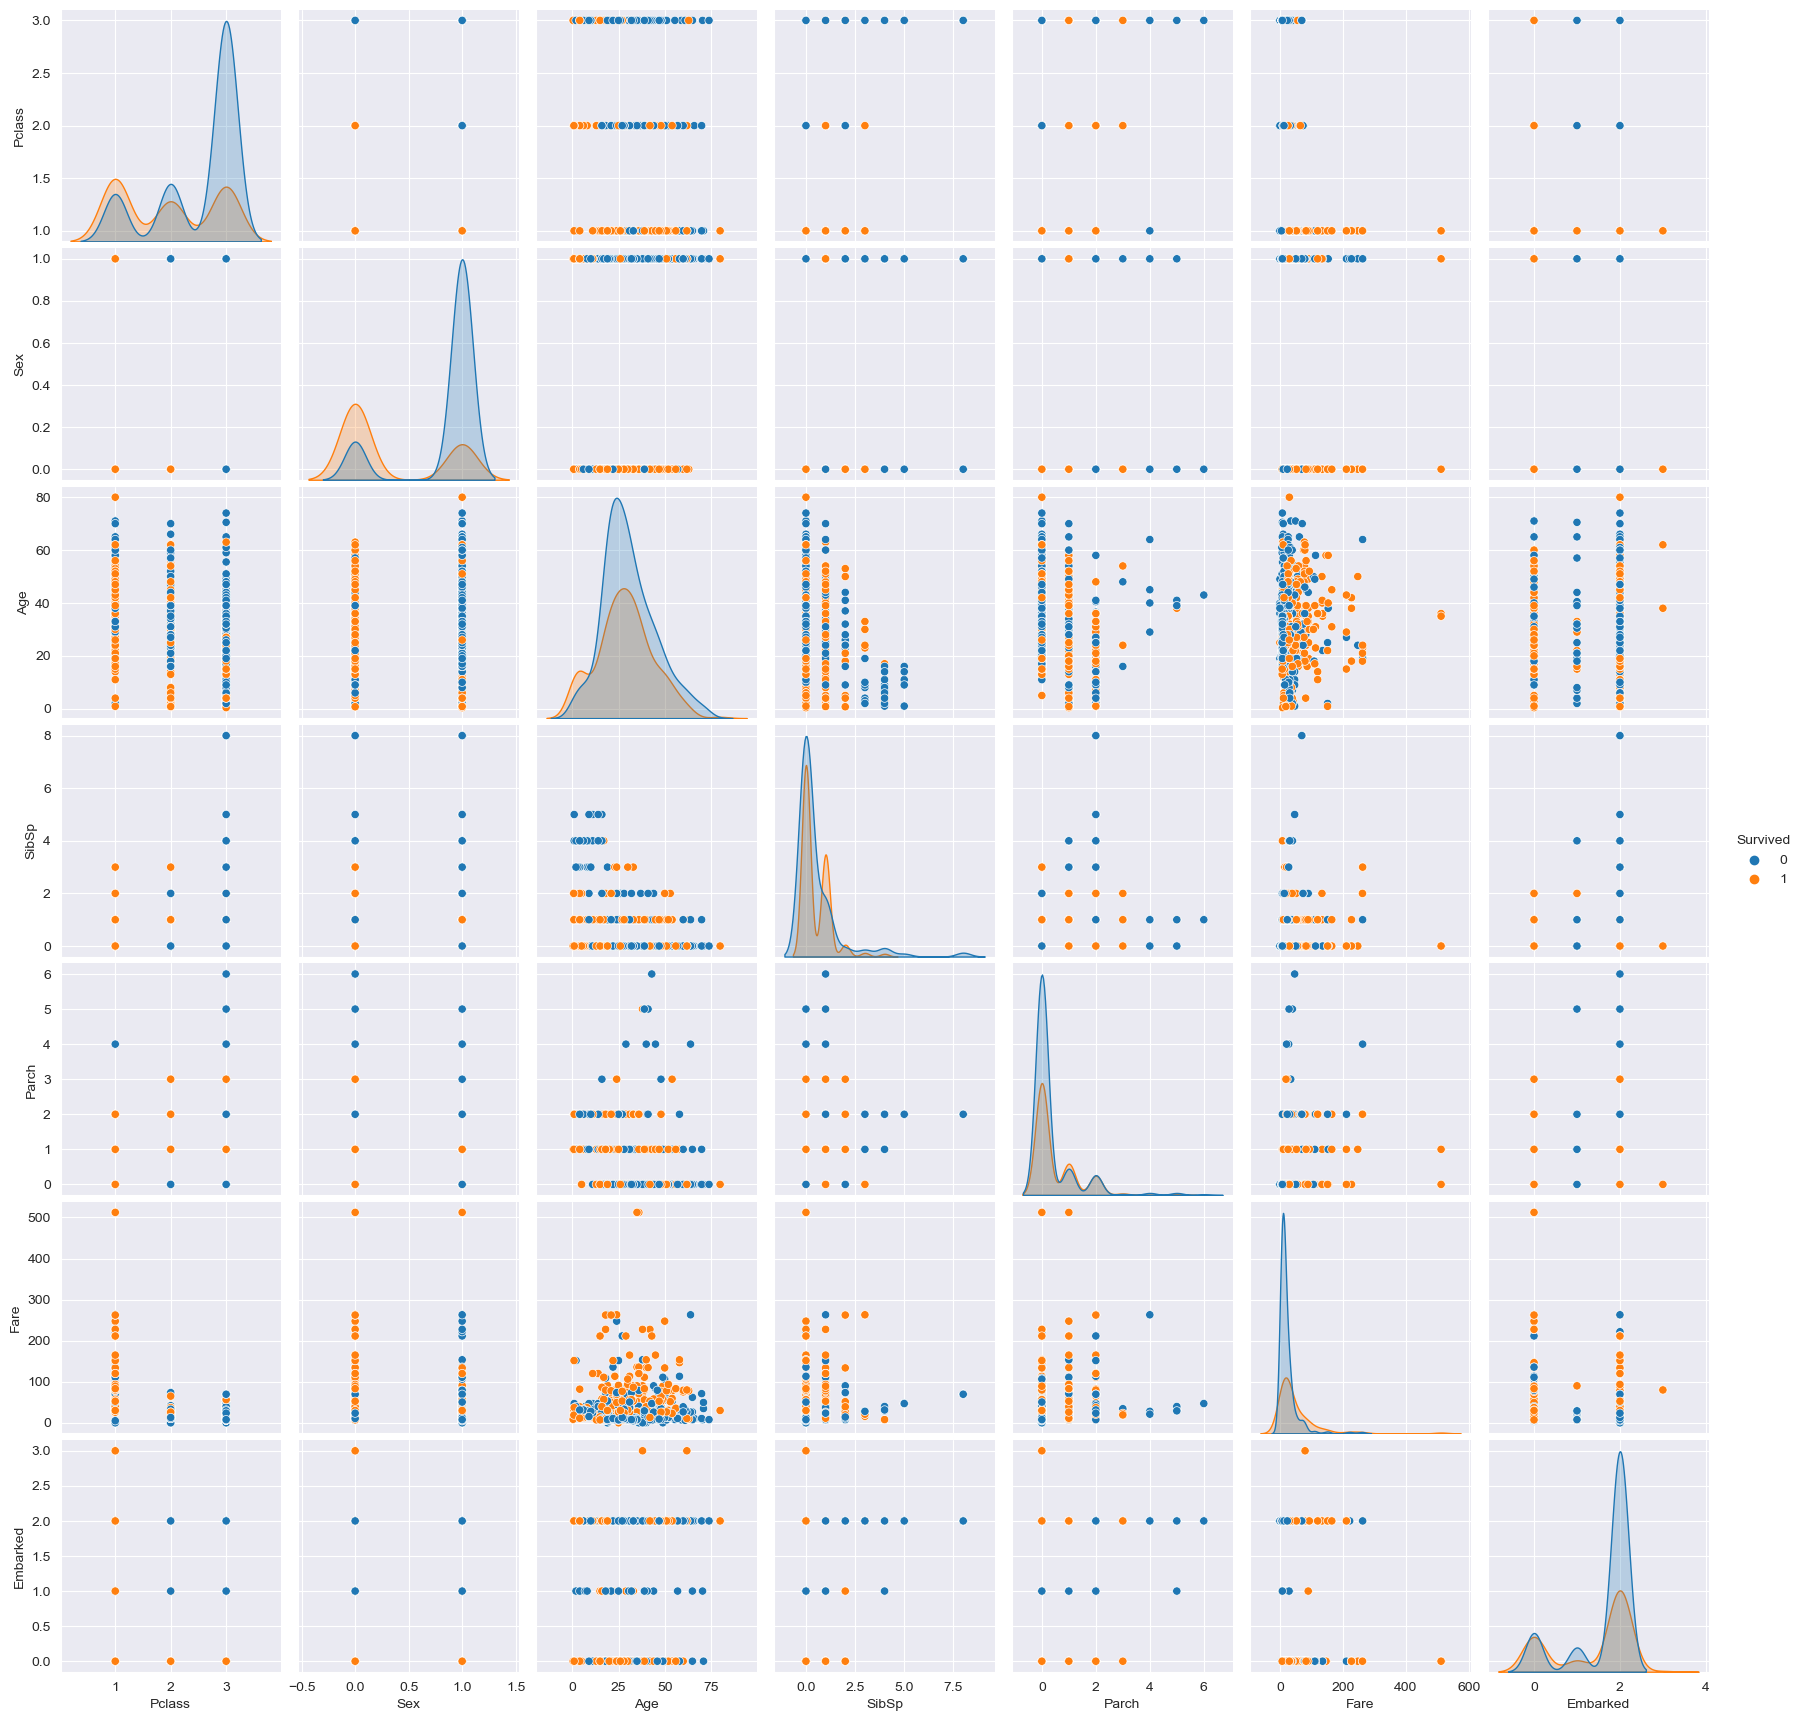

In [12]:
sns.pairplot(titanic,hue='Survived',diag_kind='kde')


# **Finding Best Feature**

In [14]:
titanic['Age'].fillna(titanic['Age'].mean(),inplace=True)

In [15]:
x=titanic.drop(['Survived'],axis=1)
y=titanic[['Survived']]


In [16]:
b_feature=SelectKBest(k=5,score_func=chi2)
fit=b_feature.fit(x,y)
df_scores = pd.DataFrame(fit.scores_)
df_columns = pd.DataFrame(x.columns)
f_Scores = pd.concat([df_columns, df_scores], axis=1)
f_Scores.columns = ['Specs', 'Score']
f_Scores.nlargest(7,'Score')

,Specs,Score
5,Fare,4518.32
1,Sex,92.70
0,Pclass,30.87
2,Age,24.69
4,Parch,10.10
6,Embarked,9.76
3,SibSp,2.58


In [17]:
x_t=titanic.drop(['SibSp','Parch','Survived','Embarked','Age','Pclass'],axis=1)
x_t

,Sex,Fare
0,1,7.25
1,0,71.28
2,0,7.92
3,0,53.10
4,1,8.05
...,...,...
886,1,13.00
887,0,30.00
888,0,23.45
889,1,30.00


# **train test splite**

In [18]:
x_train,x_test,y_train,y_test=train_test_split(x_t,y,train_size=0.7)

# **Knn**

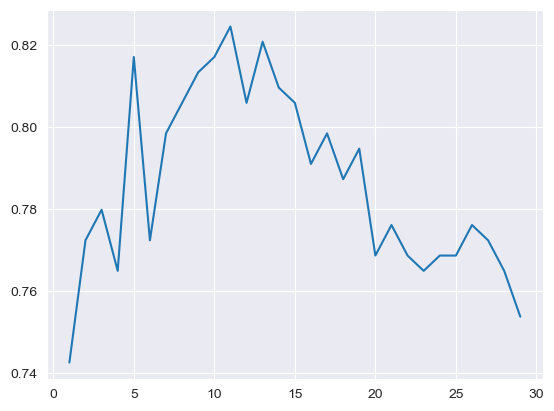

In [19]:
aa=list()

for i in list(range(1,30)):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    aa.append(metrics.accuracy_score(y_test,knn.predict(x_test)))
plt.plot(list(range(1,30)),aa)

# **GraidSerachCV and finding best parameter**

In [21]:
params={
    'n_neighbors':list(range(1,30)),
    'weights':['uniform','distance'],
    'algorithm':['ball_tree','kd_tree','brute'],
}
grid=GridSearchCV(KNeighborsClassifier(),param_grid=params,cv=5)

In [22]:
grid.fit(x_t,y)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29],
                         'weights': ['uniform', 'distance']})

In [42]:
grid.best_params_

{'C': 1, 'gamma': 'scale', 'kernel': 'linear'}

In [43]:
knn= KNeighborsClassifier(algorithm='ball_tree', n_neighbors=3, weights='distance')
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)
knn_accuracy=metrics.accuracy_score(y_test, y_pred)
print(knn_accuracy)
print(metrics.classification_report(y_test, y_pred))
print(metrics.confusion_matrix(y_test, y_pred))


0.8059701492537313
              precision    recall  f1-score   support

           0       0.85      0.82      0.84       164
           1       0.74      0.78      0.76       104

    accuracy                           0.81       268
   macro avg       0.80      0.80      0.80       268
weighted avg       0.81      0.81      0.81       268

[[135  29]
 [ 23  81]]


# **LazyClassifier for finding best algorithms based on accuracy**

In [25]:
model,predict=LazyClassifier().fit(x_train,x_test,y_train,y_test)

100%|██████████| 29/29 [00:02<00:00, 10.97it/s]


In [26]:
model.Accuracy

Model
LGBMClassifier                  0.83
ExtraTreeClassifier             0.83
ExtraTreesClassifier            0.83
RandomForestClassifier          0.82
XGBClassifier                   0.82
DecisionTreeClassifier          0.82
KNeighborsClassifier            0.82
BaggingClassifier               0.82
LinearDiscriminantAnalysis      0.81
RidgeClassifierCV               0.81
RidgeClassifier                 0.81
NuSVC                           0.81
AdaBoostClassifier              0.81
LabelSpreading                  0.81
LogisticRegression              0.81
LabelPropagation                0.81
CalibratedClassifierCV          0.81
SVC                             0.81
LinearSVC                       0.81
SGDClassifier                   0.80
QuadraticDiscriminantAnalysis   0.81
GaussianNB                      0.81
BernoulliNB                     0.81
NearestCentroid                 0.81
PassiveAggressiveClassifier     0.81
Perceptron                      0.44
DummyClassifier                 

# **SVM**

In [27]:
params={
    'C':list(range(1,10)),
    'kernel':['linear'],
    'gamma':['scale']
}

grid=GridSearchCV(SVC(),param_grid=params,cv=3,verbose=6)

In [28]:
grid.fit(x_t,y)

Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV 1/3] END ...C=1, gamma=scale, kernel=linear;, score=0.788 total time=  17.3s
[CV 2/3] END ...C=1, gamma=scale, kernel=linear;, score=0.801 total time=   9.0s
[CV 3/3] END ...C=1, gamma=scale, kernel=linear;, score=0.771 total time=  23.9s
[CV 1/3] END ...C=2, gamma=scale, kernel=linear;, score=0.788 total time=  15.7s
[CV 2/3] END ...C=2, gamma=scale, kernel=linear;, score=0.801 total time=  10.4s
[CV 3/3] END ...C=2, gamma=scale, kernel=linear;, score=0.771 total time= 1.2min
[CV 1/3] END ...C=3, gamma=scale, kernel=linear;, score=0.788 total time=  17.7s
[CV 2/3] END ...C=3, gamma=scale, kernel=linear;, score=0.801 total time=  14.2s
[CV 3/3] END ...C=3, gamma=scale, kernel=linear;, score=0.771 total time=  55.7s
[CV 1/3] END ...C=4, gamma=scale, kernel=linear;, score=0.788 total time=  29.4s
[CV 2/3] END ...C=4, gamma=scale, kernel=linear;, score=0.801 total time=  39.7s
[CV 3/3] END ...C=4, gamma=scale, kernel=linear;,

GridSearchCV(cv=3, estimator=SVC(),
             param_grid={'C': [1, 2, 3, 4, 5, 6, 7, 8, 9], 'gamma': ['scale'],
                         'kernel': ['linear']},
             verbose=6)

In [29]:
grid.best_score_

0.7867564534231201

In [30]:
grid.best_params_

{'C': 1, 'gamma': 'scale', 'kernel': 'linear'}

In [44]:
svm=SVC(C=1,kernel='linear',gamma='scale')
svm.fit(x_train,y_train)

SVC(C=1, kernel='linear')

In [45]:
y_pred=svm.predict(x_test)

In [47]:
svm_accuracy=metrics.accuracy_score(y_test,y_pred)
print(svm_accuracy)

0.8097014925373134


# **LogisticRegression**

In [34]:
logs=LogisticRegression()

In [35]:
logs.fit(x_train,y_train)

LogisticRegression()

In [48]:

y_pred=logs.predict(x_test)
LG_accuracy=metrics.accuracy_score(y_test,y_pred)
print(LG_accuracy)

0.8097014925373134


# **Decision Trees**

In [37]:
tree=DecisionTreeClassifier(max_depth=10,min_samples_split=3)
tree.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=10, min_samples_split=3)

In [49]:
y_pred=tree.predict(x_test)
Dtree_accuracy=metrics.accuracy_score(y_test,y_pred)
print(Dtree_accuracy)

0.832089552238806


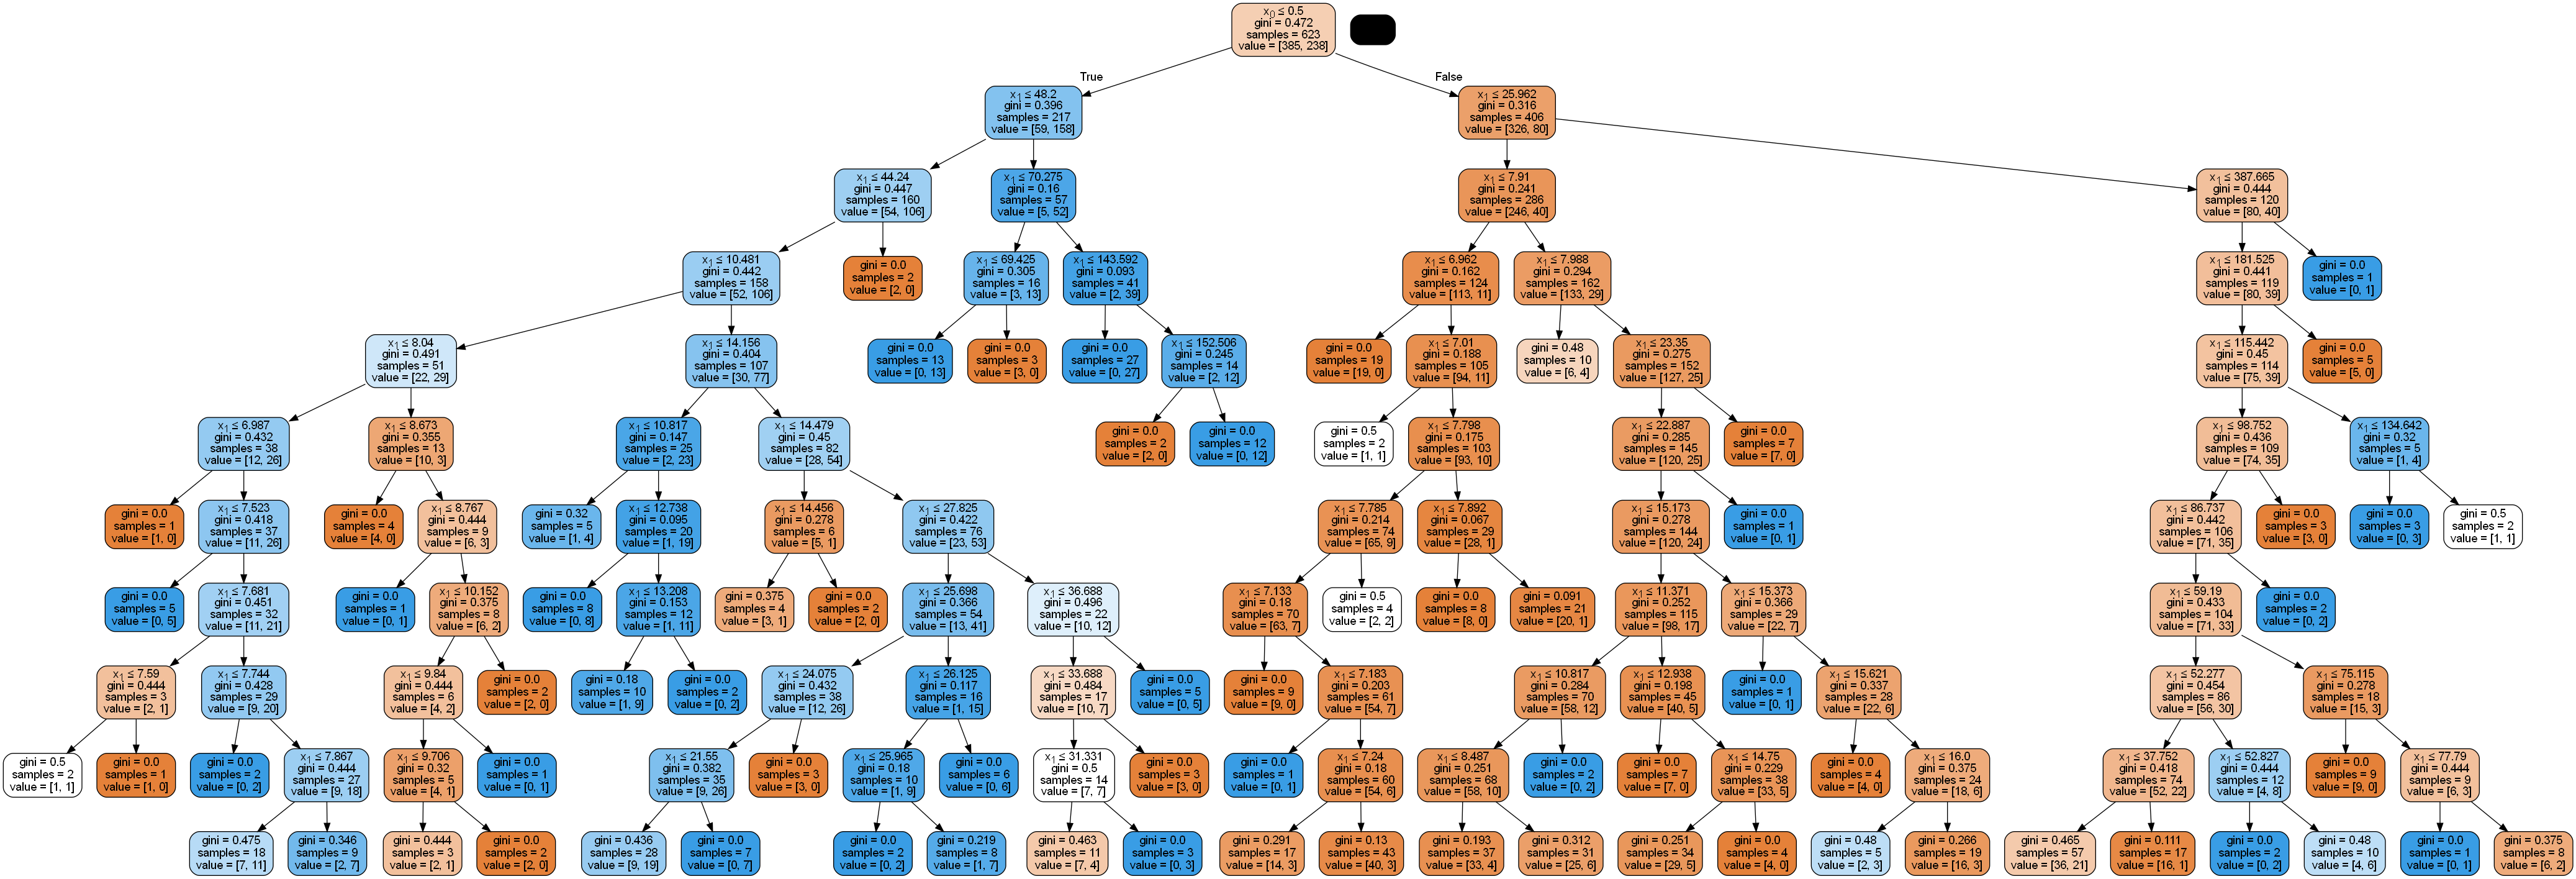

In [39]:
d_data=StringIO()
export_graphviz(tree,out_file=d_data,filled=True,rounded=True,special_characters=True)
g=pydotplus.graph_from_dot_data(d_data.getvalue())
Image(g.create_png())

# **RandomForestClassifier**


In [40]:
rand=RandomForestClassifier(n_estimators=1000,oob_score=True,ccp_alpha=10)
rand.fit(x_train,y_train)

RandomForestClassifier(ccp_alpha=10, n_estimators=1000, oob_score=True)

In [50]:
y_pred=rand.predict(x_test)
RF_accuracy=metrics.accuracy_score(y_test,y_pred)
print(RF_accuracy)

0.6119402985074627


# **accuracy**

In [69]:
model=pd.DataFrame({
    'Model':['Knn','LogisticRegression','SVM','DecisionTree','RandomForest'],
    'Accuracy':[knn_accuracy,LG_accuracy,svm_accuracy,Dtree_accuracy,RF_accuracy]
})
model.sort_values(by='Accuracy',ascending=False)

,Model,Accuracy
3,DecisionTree,0.83
1,LogisticRegression,0.81
2,SVM,0.81
0,Knn,0.81
4,RandomForest,0.61
